In [12]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/294.6 kB ? eta -:--:--
     ----                                    30.7/294.6 kB 1.3 MB/s eta 0:00:01
     ----                                    30.7/294.6 kB 1.3 MB/s eta 0:00:01
     ---------                             71.7/294.6 kB 491.5 kB/s eta 0:00:01
     -----------                           92.2/294.6 kB 655.4 kB/s eta 0:00:01
     ---------------                      122.9/294.6 kB 554.9 kB/s eta 0:00:01
     ------------------                   153.6/294.6 kB 573.4 kB/s eta 0:00:01
     -----------------------              194.6/294.6 kB 590.8 kB/s eta 0:00:01
     -------------------------------      256.0/294.6 kB 684.6 kB/s eta 0:00:01
     -------------------------------      256.0/294.6 kB 684.6 kB/s eta 0:00:01
     -------------------------------      256.0/294.6 kB 684.6 kB/s eta 0:00:01
     -------------------------------      256.0/294.6 kB 684.6 kB/s eta 0:00:01
     -------------------------------      256.0


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv("dataset/data.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [3]:
dataset.shape

(2640, 35)

In [4]:
dataset.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [5]:
missing_values = dataset.isnull().sum()

# Step 2: Display missing values as a percentage of the total values
missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100

# Step 3: Display missing values and their percentage in a DataFrame
missing_info = pd.DataFrame({'Missing_Values': missing_values, 'Percentage': missing_percentage})
print(missing_info)

                                            Missing_Values  Percentage
rank                                                     0    0.000000
finalWorth                                               0    0.000000
category                                                 0    0.000000
personName                                               0    0.000000
age                                                     65    2.462121
country                                                 38    1.439394
city                                                    72    2.727273
source                                                   0    0.000000
industries                                               0    0.000000
countryOfCitizenship                                     0    0.000000
organization                                          2315   87.689394
selfMade                                                 0    0.000000
status                                                   0    0.000000
gender

In [6]:
dataset.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


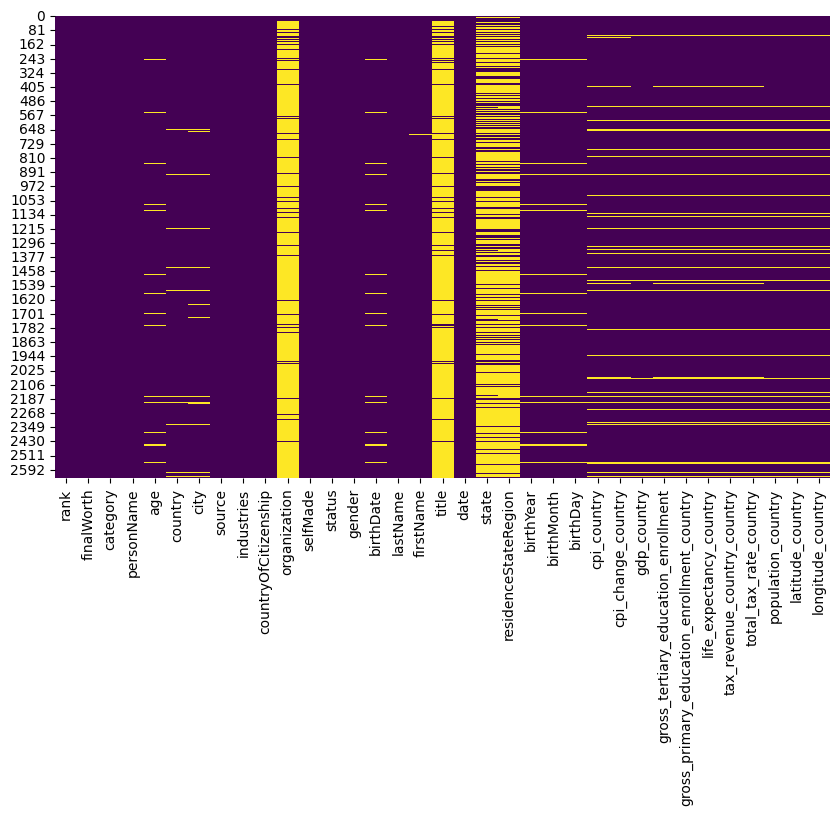

In [7]:
missing_values = dataset.isnull().sum()
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.show()

In [8]:
dataset.drop_duplicates(inplace=True)
print("There are {} duplicate values in the data.".format(dataset.duplicated().sum()))

There are 0 duplicate values in the data.


In [9]:
dataset['gdp_country'] = dataset['gdp_country'].str.replace('$','').replace(',','', regex=True).astype(float)

In [10]:
most_common_country = dataset['country'].mode().iloc[0]
dataset['country'].fillna(most_common_country, inplace=True)

In [11]:
# Check if 'birthYear' column is sorted in ascending order
is_sorted_year = dataset['birthYear'].equals(dataset['birthYear'].sort_values())

# Check if 'birthDate' column is sorted in ascending order
is_sorted_date = dataset['birthDate'].equals(dataset['birthDate'].sort_values())

# Print the results
print(f"The 'birthYear' column is sorted in ascending order: {is_sorted_year}")
print(f"The 'birthDate' column is sorted in ascending order: {is_sorted_date}")

The 'birthYear' column is sorted in ascending order: False
The 'birthDate' column is sorted in ascending order: False


In [12]:
# Fill missing values in 'birthYear' with the most common value
most_common_year = dataset['birthYear'].mode().iloc[0]
dataset['birthYear'].fillna(most_common_year, inplace=True)

# Fill missing values in 'birthDay' with the most common value
most_common_day = dataset['birthDay'].mode().iloc[0]
dataset['birthDay'].fillna(most_common_day, inplace=True)

# Fill missing values in 'birthMonth' with the most common value
most_common_month = dataset['birthMonth'].mode().iloc[0]
dataset['birthMonth'].fillna(most_common_month, inplace=True)

# Combine 'birthYear', 'birthMonth', and 'birthDay' to create a new datetime column
new_birth_date = pd.to_datetime(dataset['birthYear'].astype(int).astype(str) + '-' + dataset['birthMonth'].astype(int).astype(str) + '-' + dataset['birthDay'].astype(int).astype(str), errors='coerce')

# Fill missing values in 'birthDate' with values from the new column
dataset['birthDate'].fillna(new_birth_date, inplace=True)

# Check if all missing values in 'birthDate' are filled
missing_birth_date = dataset[dataset['birthDate'].isnull()]
if missing_birth_date.empty:
    print("All missing values in 'birthDate' are filled.")
else:
    print(f"Missing values still present in 'birthDate' at indices: {missing_birth_date.index}")

All missing values in 'birthDate' are filled.


In [13]:
columns_to_fill = ['gdp_country', 'gross_tertiary_education_enrollment',
                   'gross_primary_education_enrollment_country', 
                   'total_tax_rate_country', 'population_country', 'latitude_country', 'longitude_country']

for column in columns_to_fill:
    # Group by 'country' and find the most common value for each column
    def most_common_value(x):
        mode_result = x.mode()
        return mode_result.iloc[0] if not mode_result.empty else None

    most_common_values = dataset.groupby('country')[column].agg(most_common_value).reset_index()

    # Merge the most common values back to the original DataFrame
    dataset = pd.merge(dataset, most_common_values, on='country', how='left', suffixes=('', '_most_common'))

    # Fill missing values in the column with the most common value for each country
    dataset[column].fillna(dataset[column + '_most_common'], inplace=True)

    # Drop the temporary column
    dataset.drop(column + '_most_common', axis=1, inplace=True)

# Check the number of remaining missing values
remaining_missing_values = dataset.isnull().sum().sum()
print(f"There are {remaining_missing_values} missing values in the data.")

There are 10204 missing values in the data.


In [14]:
columns_to_fill = ['gdp_country', 'gross_tertiary_education_enrollment',
                   'gross_primary_education_enrollment_country',
                   'total_tax_rate_country', 'population_country']

# Fill missing values with the mean of each column
dataset[columns_to_fill] = dataset[columns_to_fill].apply(lambda x: x.fillna(x.mean()))

# Convert specified columns to integers and round up
dataset[columns_to_fill] = np.ceil(dataset[columns_to_fill]).astype(int)

# Check the number of remaining missing values
remaining_missing_values = dataset.isnull().sum().sum()
print(f"There are {remaining_missing_values} missing values in the data after filling with the mean.")

There are 9521 missing values in the data after filling with the mean.


In [15]:
# List of columns to fill missing values
columns_to_fill = ['latitude_country', 'longitude_country']

# Define the columns to drop
columns_to_drop = ['latitude_country', 'longitude_country']

# Drop the specified columns
dataset.drop(columns=columns_to_drop, axis=1, inplace=True)

In [16]:
# Convert 'birthDate' to datetime
dataset['birthDate'] = pd.to_datetime(dataset['birthDate'], errors='coerce')

# Calculate age from 'birthDate'
current_year = pd.to_datetime('now').year
dataset['age'] = current_year - dataset['birthDate'].dt.year

# Fill missing values in 'age' with the calculated age from 'birthDate'
dataset['age'].fillna(current_year - dataset['birthDate'].dt.year, inplace=True)

In [18]:
# Count the number of missing values in each row
missing_rows = dataset.isnull().sum(axis=1)

# Count the total number of rows with at least one missing value
total_missing_rows = len(missing_rows[missing_rows > 0])

# Print the result
print(f'Total rows with missing values: {total_missing_rows}')

Total rows with missing values: 2402


# Discriptive Statistics

In [19]:
#Descriptive Statistics Summary for Age of billionaires
# Round up and convert 'age' to integer
dataset['age'] = np.ceil(dataset['age']).astype(int)

# Print the descriptive statistics summary with integer values
summary_stats = dataset['age'].describe().astype(int)

# Display the result
print("Descriptive Statistics Summary for Rounded-Up Age:")
print(summary_stats)

Descriptive Statistics Summary for Rounded-Up Age:
count    2640
mean       65
std        13
min        19
25%        57
50%        65
75%        75
max       102
Name: age, dtype: int32


In [20]:
# Calculate the percentage of males and females
gender_counts = dataset['gender'].value_counts(normalize=True)*100

# Display the result
print("Percentage % of Males and Females in the Dataset:")
print(gender_counts.round(2))

Percentage % of Males and Females in the Dataset:
gender
M    87.23
F    12.77
Name: proportion, dtype: float64


In [21]:
# Calculate the percentage count of self-made and inherited billionaires
self_made_counts = dataset['selfMade'].value_counts(normalize=True) * 100

# Create a DataFrame from the percentages
self_made_percentage_table = pd.DataFrame({
    'Status': ['Self-Made', 'Inherited'],
    'Percentage %': self_made_counts.values
})

# Display the result
print("Percentage Count of Self-Made and Inherited Billionaires:")
print(self_made_percentage_table.round(2))

Percentage Count of Self-Made and Inherited Billionaires:
      Status  Percentage %
0  Self-Made         68.64
1  Inherited         31.36


In [23]:
def categorical_descriptive_stats(column):
    """
    Calculate descriptive statistics for a categorical column.
    
    Parameters:
    - column: Pandas Series, the categorical column
    
    Returns:
    - None (prints the results)
    """
    print(f"Descriptive Statistics for '{column.name}':")
    
    # Frequency Counts
    frequency_counts = column.value_counts()
    print(f"Frequency Counts:\n{frequency_counts}\n")
    
    # Mode
    mode_value = column.mode().iloc[0]
    print(f"Mode: {mode_value}\n")
    
    # Unique Values
    unique_values = column.unique()
    print(f"Unique Values:\n{unique_values}\n")



In [24]:
categorical_descriptive_stats(dataset['country'])

Descriptive Statistics for 'country':
Frequency Counts:
country
United States           792
China                   523
India                   157
Germany                 102
United Kingdom           82
                       ... 
Portugal                  1
Georgia                   1
Eswatini (Swaziland)      1
Uzbekistan                1
Armenia                   1
Name: count, Length: 78, dtype: int64

Mode: United States

Unique Values:
['France' 'United States' 'Mexico' 'India' 'Spain' 'China' 'Canada'
 'Germany' 'Switzerland' 'Belgium' 'Hong Kong' 'Austria' 'Japan'
 'United Kingdom' 'Australia' 'Indonesia' 'United Arab Emirates' 'Russia'
 'Chile' 'Monaco' 'Czech Republic' 'Sweden' 'Thailand' 'Uzbekistan'
 'Singapore' 'Nigeria' 'Israel' 'Italy' 'South Africa' 'Brazil' 'Malaysia'
 'South Korea' 'New Zealand' 'Philippines' 'Taiwan' 'Norway' 'Egypt'
 'Denmark' 'Eswatini (Swaziland)' 'Colombia' 'Netherlands' 'Poland'
 'Bahamas' 'Ukraine' 'Cayman Islands' 'Greece' 'Turkey' 'Argentina

In [27]:
categorical_descriptive_stats(dataset['industries'])

Descriptive Statistics for 'industries':
Frequency Counts:
industries
Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
Energy                        100
Media & Entertainment          91
Metals & Mining                74
Automotive                     73
Service                        53
Construction & Engineering     45
Logistics                      40
Sports                         39
Telecom                        31
Gambling & Casinos             25
Name: count, dtype: int64

Mode: Finance & Investments

Unique Values:
['Fashion & Retail' 'Automotive' 'Technology' 'Finance & Investments'
 'Media & Entertainment' 'Telecom' 'Diversified' 'Food & Beverage'
 'Logistics' 'Gambling & Casinos' 'Manufacturing' 'Real Estate'
 'Metals & Mining' 'Energy' 'Healthcare' 'Serv